In [ ]:
!pip install -q tensorflow


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

sns.set(style="whitegrid")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving maintenance_dataset.xlsx to maintenance_dataset.xlsx


In [ ]:
df = pd.read_excel("maintenance_dataset.xlsx")

print(df.shape)


(23617, 47)


In [ ]:
df.head()


,"1.Safe access to equipment/machine room?(illumination, protected access ways) هل هناك وصول آمن إلى المعدات والآلات؟ (الإضاءة ، طرق الوصول المحمية)","2.Is the area free of likely hazardous substances? (eg. asbestos, faeces, vermin, mobile phone masts) هل المنطقة خالية من المواد الخطرة المحتملة؟ (على سبيل المثال ، الأسبتوس والبراز والحشرات وأبراج الهاتف المحمول)",3.Are barriers available for both ends of the equipment?هل توجد حواجز لحماية عمليات الإنزال؟,4.Are there division screens fitted between adjacent units at the end stations? هل يوجد حاجز تقسيم بين المصاعد المتجاورة؟,"5.Are hazards associated with working at height adequately protected? (eg. Ladders, trapdoors) هل الأخطار المرتبطة بالعمل على ارتفاعات محمية بشكل كاف؟ (على سبيل المثال ، السلالم والأبواب الجانبية)",6.Is the controller lockable and capable of being opened without causing any obstructions?هل وحدة التحكم قابلة للقفل ويمكن فتحها دون التسبب في أي عوائق؟,7.ELV/Is the moving machinery/working area adequately guarded?هل الأجزاء الميكانيكية المتحركة محمية بشكل كافٍ؟,8.Is there a barrier to demarcate the controller working area?هل يوجد عائق لترسيم منطقة عمل وحدة التحكم؟,9.Are the rubber mats located at the front of the controllers هل السجادة المطاطية متاحة للعمل على وحدة التحكم؟,10.Are main electrical circuits adequately guarded and signed accordingly? هل الدوائر الكهربائية الرئيسية محمية وموقعة على النحو المناسب؟,...,38.Are all electrical circuit adequately guarded? هل جميع الدوائر الكهربائية محمية بشكل كافٍ؟,39.Is the equipment capable of being mechanically secured to prevent movement? هل المعدات قابلة للتأمين ميكانيكيًا لمنع الحركة؟,40.Is there a compliant inspection control fitted? هل هناك أداة تحكم في العربة متوافقة (توقف ، فحص / عادي وهل يوجد مفتاح إيقاف على بعد متر واحد من الهبوط؟,42.Is there any low headroom / crushing hazards? Are these controlled and signed accordingly? هل هناك أي ارتفاع منخفض / مخاطر التكسير؟ هل هذه خاضعة للرقابة وموقعة وفقًا لذلك؟,43.Is there suitable protection in place to prevent persons being struck by fixed/moving objects whilst travelling on the carrier? هل يوجد مكان مناسب للحماية لمنع سقوط الأشخاص تحت الحاملة (مثل المريلة) / التعرض للضرب من قبل الناقل؟,44.Is there suitable protection in place to prevent persons being struck by other machinery operating adjacent to the carrier? هل توجد حماية مناسبة لمنع تعرض الأشخاص للضرب من خلال تحريك الأشياء أثناء العمل في الحفرة / أسفل الناقل؟,45.Is there suitable means of access to the pit / beneath the carrier? هل توجد وسائل مناسبة للوصول إلى الحفرة / أسفل الناقل؟,46.Is it possible to operate a stop switch before accessing the pit / beneath the carrier? هل من الممكن تشغيل مفتاح إيقاف قبل الوصول إلى الحفرة / أسفل الناقل؟,47.Are there divisions screen fitted between adjacent lifts?2 هل يوجد حاجز تقسيم بين المصاعد المتجاورة؟,maintenance_needed
0,yes,NaN,no,no,yes,yes,yes,no,no,no,...,yes,no,yes,yes,no,yes,NaN,yes,no,no
1,yes,no,no,yes,NaN,no,NaN,no,no,NaN,...,yes,yes,yes,no,no,no,no,yes,no,yes
2,no,no,no,no,no,yes,yes,yes,yes,no,...,no,yes,yes,yes,yes,NaN,yes,no,no,no
3,yes,NaN,NaN,yes,no,yes,yes,yes,no,no,...,yes,no,yes,NaN,yes,yes,yes,NaN,no,yes
4,yes,no,no,no,no,yes,yes,no,NaN,no,...,no,yes,yes,yes,yes,NaN,yes,no,no,no


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23617 entries, 0 to 23616
Data columns (total 47 columns):
 #   Column                                                                                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                   --------------  ----- 
 0   1.Safe access to equipment/machine room?(illumination, protected access ways) هل هناك وصول آمن إلى المعدات والآلات؟ (الإضاءة ، طرق الوصول المحمية)                                                                                       21305 non-null  object
 1   2.Is the area free of likely hazardous substances? (eg. asbestos, faeces, vermin, mobile phone masts) ه

In [ ]:
df.describe(include="all")


,"1.Safe access to equipment/machine room?(illumination, protected access ways) هل هناك وصول آمن إلى المعدات والآلات؟ (الإضاءة ، طرق الوصول المحمية)","2.Is the area free of likely hazardous substances? (eg. asbestos, faeces, vermin, mobile phone masts) هل المنطقة خالية من المواد الخطرة المحتملة؟ (على سبيل المثال ، الأسبتوس والبراز والحشرات وأبراج الهاتف المحمول)",3.Are barriers available for both ends of the equipment?هل توجد حواجز لحماية عمليات الإنزال؟,4.Are there division screens fitted between adjacent units at the end stations? هل يوجد حاجز تقسيم بين المصاعد المتجاورة؟,"5.Are hazards associated with working at height adequately protected? (eg. Ladders, trapdoors) هل الأخطار المرتبطة بالعمل على ارتفاعات محمية بشكل كاف؟ (على سبيل المثال ، السلالم والأبواب الجانبية)",6.Is the controller lockable and capable of being opened without causing any obstructions?هل وحدة التحكم قابلة للقفل ويمكن فتحها دون التسبب في أي عوائق؟,7.ELV/Is the moving machinery/working area adequately guarded?هل الأجزاء الميكانيكية المتحركة محمية بشكل كافٍ؟,8.Is there a barrier to demarcate the controller working area?هل يوجد عائق لترسيم منطقة عمل وحدة التحكم؟,9.Are the rubber mats located at the front of the controllers هل السجادة المطاطية متاحة للعمل على وحدة التحكم؟,10.Are main electrical circuits adequately guarded and signed accordingly? هل الدوائر الكهربائية الرئيسية محمية وموقعة على النحو المناسب؟,...,38.Are all electrical circuit adequately guarded? هل جميع الدوائر الكهربائية محمية بشكل كافٍ؟,39.Is the equipment capable of being mechanically secured to prevent movement? هل المعدات قابلة للتأمين ميكانيكيًا لمنع الحركة؟,40.Is there a compliant inspection control fitted? هل هناك أداة تحكم في العربة متوافقة (توقف ، فحص / عادي وهل يوجد مفتاح إيقاف على بعد متر واحد من الهبوط؟,42.Is there any low headroom / crushing hazards? Are these controlled and signed accordingly? هل هناك أي ارتفاع منخفض / مخاطر التكسير؟ هل هذه خاضعة للرقابة وموقعة وفقًا لذلك؟,43.Is there suitable protection in place to prevent persons being struck by fixed/moving objects whilst travelling on the carrier? هل يوجد مكان مناسب للحماية لمنع سقوط الأشخاص تحت الحاملة (مثل المريلة) / التعرض للضرب من قبل الناقل؟,44.Is there suitable protection in place to prevent persons being struck by other machinery operating adjacent to the carrier? هل توجد حماية مناسبة لمنع تعرض الأشخاص للضرب من خلال تحريك الأشياء أثناء العمل في الحفرة / أسفل الناقل؟,45.Is there suitable means of access to the pit / beneath the carrier? هل توجد وسائل مناسبة للوصول إلى الحفرة / أسفل الناقل؟,46.Is it possible to operate a stop switch before accessing the pit / beneath the carrier? هل من الممكن تشغيل مفتاح إيقاف قبل الوصول إلى الحفرة / أسفل الناقل؟,47.Are there divisions screen fitted between adjacent lifts?2 هل يوجد حاجز تقسيم بين المصاعد المتجاورة؟,maintenance_needed
count,21305,21278,21223,21267,21245,21222,21324,21292,21200,21308,...,21255,21273,21144,21210,21257,21291,21191,21268,21232,23617
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,yes,no,no,no,no,yes,yes,yes,yes,no,...,yes,yes,no,no,no,yes,yes,no,no,yes
freq,10695,10687,10772,10783,10709,10632,10674,10652,10609,10746,...,10639,10648,10611,10641,10672,10774,10696,10696,10650,13203


In [ ]:
df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

df.replace({"yes": 1, "no": 0, "n/a": np.nan}, inplace=True)


/tmp/ipython-input-1658115983.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)
/tmp/ipython-input-1658115983.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"yes": 1, "no": 0, "n/a": np.nan}, inplace=True)


In [ ]:
df

,"1.Safe access to equipment/machine room?(illumination, protected access ways) هل هناك وصول آمن إلى المعدات والآلات؟ (الإضاءة ، طرق الوصول المحمية)","2.Is the area free of likely hazardous substances? (eg. asbestos, faeces, vermin, mobile phone masts) هل المنطقة خالية من المواد الخطرة المحتملة؟ (على سبيل المثال ، الأسبتوس والبراز والحشرات وأبراج الهاتف المحمول)",3.Are barriers available for both ends of the equipment?هل توجد حواجز لحماية عمليات الإنزال؟,4.Are there division screens fitted between adjacent units at the end stations? هل يوجد حاجز تقسيم بين المصاعد المتجاورة؟,"5.Are hazards associated with working at height adequately protected? (eg. Ladders, trapdoors) هل الأخطار المرتبطة بالعمل على ارتفاعات محمية بشكل كاف؟ (على سبيل المثال ، السلالم والأبواب الجانبية)",6.Is the controller lockable and capable of being opened without causing any obstructions?هل وحدة التحكم قابلة للقفل ويمكن فتحها دون التسبب في أي عوائق؟,7.ELV/Is the moving machinery/working area adequately guarded?هل الأجزاء الميكانيكية المتحركة محمية بشكل كافٍ؟,8.Is there a barrier to demarcate the controller working area?هل يوجد عائق لترسيم منطقة عمل وحدة التحكم؟,9.Are the rubber mats located at the front of the controllers هل السجادة المطاطية متاحة للعمل على وحدة التحكم؟,10.Are main electrical circuits adequately guarded and signed accordingly? هل الدوائر الكهربائية الرئيسية محمية وموقعة على النحو المناسب؟,...,38.Are all electrical circuit adequately guarded? هل جميع الدوائر الكهربائية محمية بشكل كافٍ؟,39.Is the equipment capable of being mechanically secured to prevent movement? هل المعدات قابلة للتأمين ميكانيكيًا لمنع الحركة؟,40.Is there a compliant inspection control fitted? هل هناك أداة تحكم في العربة متوافقة (توقف ، فحص / عادي وهل يوجد مفتاح إيقاف على بعد متر واحد من الهبوط؟,42.Is there any low headroom / crushing hazards? Are these controlled and signed accordingly? هل هناك أي ارتفاع منخفض / مخاطر التكسير؟ هل هذه خاضعة للرقابة وموقعة وفقًا لذلك؟,43.Is there suitable protection in place to prevent persons being struck by fixed/moving objects whilst travelling on the carrier? هل يوجد مكان مناسب للحماية لمنع سقوط الأشخاص تحت الحاملة (مثل المريلة) / التعرض للضرب من قبل الناقل؟,44.Is there suitable protection in place to prevent persons being struck by other machinery operating adjacent to the carrier? هل توجد حماية مناسبة لمنع تعرض الأشخاص للضرب من خلال تحريك الأشياء أثناء العمل في الحفرة / أسفل الناقل؟,45.Is there suitable means of access to the pit / beneath the carrier? هل توجد وسائل مناسبة للوصول إلى الحفرة / أسفل الناقل؟,46.Is it possible to operate a stop switch before accessing the pit / beneath the carrier? هل من الممكن تشغيل مفتاح إيقاف قبل الوصول إلى الحفرة / أسفل الناقل؟,47.Are there divisions screen fitted between adjacent lifts?2 هل يوجد حاجز تقسيم بين المصاعد المتجاورة؟,maintenance_needed
0,1.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,NaN,1.0,0.0,0
1,1.0,0.0,0.0,1.0,NaN,0.0,NaN,0.0,0.0,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,NaN,1.0,0.0,0.0,0
3,1.0,NaN,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,NaN,1.0,1.0,1.0,NaN,0.0,1
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,...,0.0,1.0,1.0,1.0,1.0,NaN,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23612,1.0,0.0,1.0,1.0,NaN,0.0,1.0,0.0,1.0,1.0,...,1.0,NaN,1.0,NaN,1.0,0.0,0.0,NaN,0.0,1
23613,NaN,0.0,0.0,1.0,0.0,NaN,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1
23614,1.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,NaN,NaN,0.0,0.0,1.0,0.0,1.0,1.0,0
23615,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,1


In [ ]:
missing_ratio = df.isna().mean().sort_values(ascending=False)


In [ ]:
missing_ratio.head(10)

,0
40.Is there a compliant inspection control fitted? هل هناك أداة تحكم في العربة متوافقة (توقف ، فحص / عادي وهل يوجد مفتاح إيقاف على بعد متر واحد من الهبوط؟,0.104713
45.Is there suitable means of access to the pit / beneath the carrier? هل توجد وسائل مناسبة للوصول إلى الحفرة / أسفل الناقل؟,0.102723
16.Are there any low headroom hazards? Are these controlled and signages available? هل هناك أي مخاطر منخفضة الارتفاع؟ هل هذه الإشارات الخاضعة للرقابة متوفرة؟,0.102426
9.Are the rubber mats located at the front of the controllers هل السجادة المطاطية متاحة للعمل على وحدة التحكم؟,0.102342
"36.Is there a step guard fitted between the tank and rotating step parts, or photocell device installed and working? هل يوجد واقي للخطوة بين الخزان وأجزاء الخطوة الدوارة ، أو هل تم تركيب وتشغيل جهاز الخلية الكهروضوئية؟",0.102172
"13.Can the safety circuit be verified? (door landing door locks & car-top, controller) هل يمكن التحقق من دائرة الأمان؟ (أقفال باب هبوط الباب وسطح عربة المصعد ، وحدة تحكم)",0.102087
42.Is there any low headroom / crushing hazards? Are these controlled and signed accordingly? هل هناك أي ارتفاع منخفض / مخاطر التكسير؟ هل هذه خاضعة للرقابة وموقعة وفقًا لذلك؟,0.101918
"35.On the pendant maintenance control, has the safety circuit been verified? هل تم التحقق من دائرة السلامة؟",0.101876
"30.If hydraulic, is there a pit prop available for use? إذا كانت هيدروليكية ، فهل هناك دعامة حفرة متاحة للاستخدام؟",0.101791
37.Is the equipment capable of being electrically locked and tagged out? هل الجهاز قادر على أن يكون مقفلًا وكهربائيًا؟,0.101622


In [ ]:
# Drop columns with >40% missing
df = df.loc[:, missing_ratio < 0.4]
df.fillna(df.mode().iloc[0], inplace=True)

df.isna().sum().sum()


np.int64(0)

In [ ]:
df

,"1.Safe access to equipment/machine room?(illumination, protected access ways) هل هناك وصول آمن إلى المعدات والآلات؟ (الإضاءة ، طرق الوصول المحمية)","2.Is the area free of likely hazardous substances? (eg. asbestos, faeces, vermin, mobile phone masts) هل المنطقة خالية من المواد الخطرة المحتملة؟ (على سبيل المثال ، الأسبتوس والبراز والحشرات وأبراج الهاتف المحمول)",3.Are barriers available for both ends of the equipment?هل توجد حواجز لحماية عمليات الإنزال؟,4.Are there division screens fitted between adjacent units at the end stations? هل يوجد حاجز تقسيم بين المصاعد المتجاورة؟,"5.Are hazards associated with working at height adequately protected? (eg. Ladders, trapdoors) هل الأخطار المرتبطة بالعمل على ارتفاعات محمية بشكل كاف؟ (على سبيل المثال ، السلالم والأبواب الجانبية)",6.Is the controller lockable and capable of being opened without causing any obstructions?هل وحدة التحكم قابلة للقفل ويمكن فتحها دون التسبب في أي عوائق؟,7.ELV/Is the moving machinery/working area adequately guarded?هل الأجزاء الميكانيكية المتحركة محمية بشكل كافٍ؟,8.Is there a barrier to demarcate the controller working area?هل يوجد عائق لترسيم منطقة عمل وحدة التحكم؟,9.Are the rubber mats located at the front of the controllers هل السجادة المطاطية متاحة للعمل على وحدة التحكم؟,10.Are main electrical circuits adequately guarded and signed accordingly? هل الدوائر الكهربائية الرئيسية محمية وموقعة على النحو المناسب؟,...,38.Are all electrical circuit adequately guarded? هل جميع الدوائر الكهربائية محمية بشكل كافٍ؟,39.Is the equipment capable of being mechanically secured to prevent movement? هل المعدات قابلة للتأمين ميكانيكيًا لمنع الحركة؟,40.Is there a compliant inspection control fitted? هل هناك أداة تحكم في العربة متوافقة (توقف ، فحص / عادي وهل يوجد مفتاح إيقاف على بعد متر واحد من الهبوط؟,42.Is there any low headroom / crushing hazards? Are these controlled and signed accordingly? هل هناك أي ارتفاع منخفض / مخاطر التكسير؟ هل هذه خاضعة للرقابة وموقعة وفقًا لذلك؟,43.Is there suitable protection in place to prevent persons being struck by fixed/moving objects whilst travelling on the carrier? هل يوجد مكان مناسب للحماية لمنع سقوط الأشخاص تحت الحاملة (مثل المريلة) / التعرض للضرب من قبل الناقل؟,44.Is there suitable protection in place to prevent persons being struck by other machinery operating adjacent to the carrier? هل توجد حماية مناسبة لمنع تعرض الأشخاص للضرب من خلال تحريك الأشياء أثناء العمل في الحفرة / أسفل الناقل؟,45.Is there suitable means of access to the pit / beneath the carrier? هل توجد وسائل مناسبة للوصول إلى الحفرة / أسفل الناقل؟,46.Is it possible to operate a stop switch before accessing the pit / beneath the carrier? هل من الممكن تشغيل مفتاح إيقاف قبل الوصول إلى الحفرة / أسفل الناقل؟,47.Are there divisions screen fitted between adjacent lifts?2 هل يوجد حاجز تقسيم بين المصاعد المتجاورة؟,maintenance_needed
0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0
3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23612,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
23613,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1
23614,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0
23615,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1


In [ ]:
features = df.drop(columns=["maintenance_needed"], errors="ignore")


In [ ]:
def compute_risk(row):
    risk = 0
    for col in row.index:
        if "electrical" in col.lower():
            risk += (1 - row[col]) * 3
        elif "machinery" in col.lower():
            risk += (1 - row[col]) * 3
        elif "access" in col.lower():
            risk += (1 - row[col]) * 2
        else:
            risk += (1 - row[col]) * 1
    return risk

df["Risk_Score"] = features.apply(compute_risk, axis=1)


In [ ]:
df["Risk_Level"] = pd.cut(
    df["Risk_Score"],
    bins=[-1, 10, 20, 35, 100],
    labels=[0, 1, 2, 3]  # Low, Medium, High, Critical
)

df["Risk_Level"].value_counts()


,count
Risk_Level,
2,15772
3,7597
1,248
0,0


/tmp/ipython-input-3840928028.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Risk_Level"], palette=custom_colors)
/tmp/ipython-input-3840928028.py:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df["Risk_Level"], palette=custom_colors)


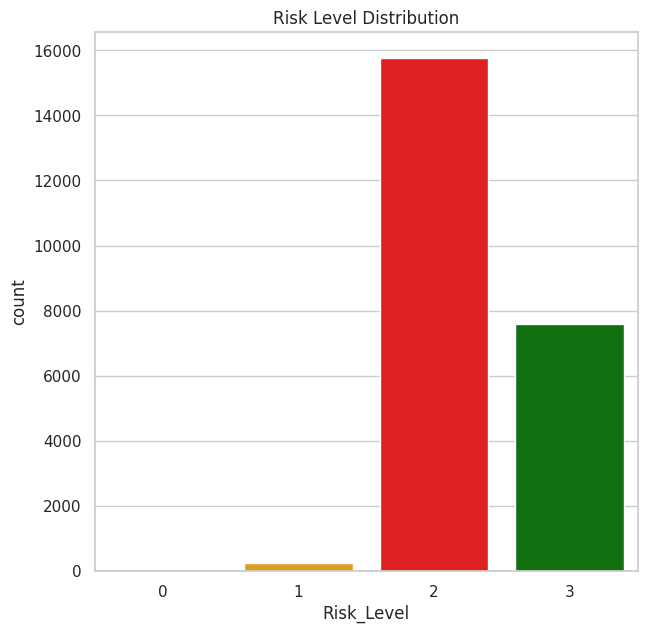

In [ ]:
custom_colors = ["green", "orange", "red"]

plt.figure(figsize=(7,7))
sns.countplot(x=df["Risk_Level"], palette=custom_colors)
plt.title("Risk Level Distribution")
plt.show()


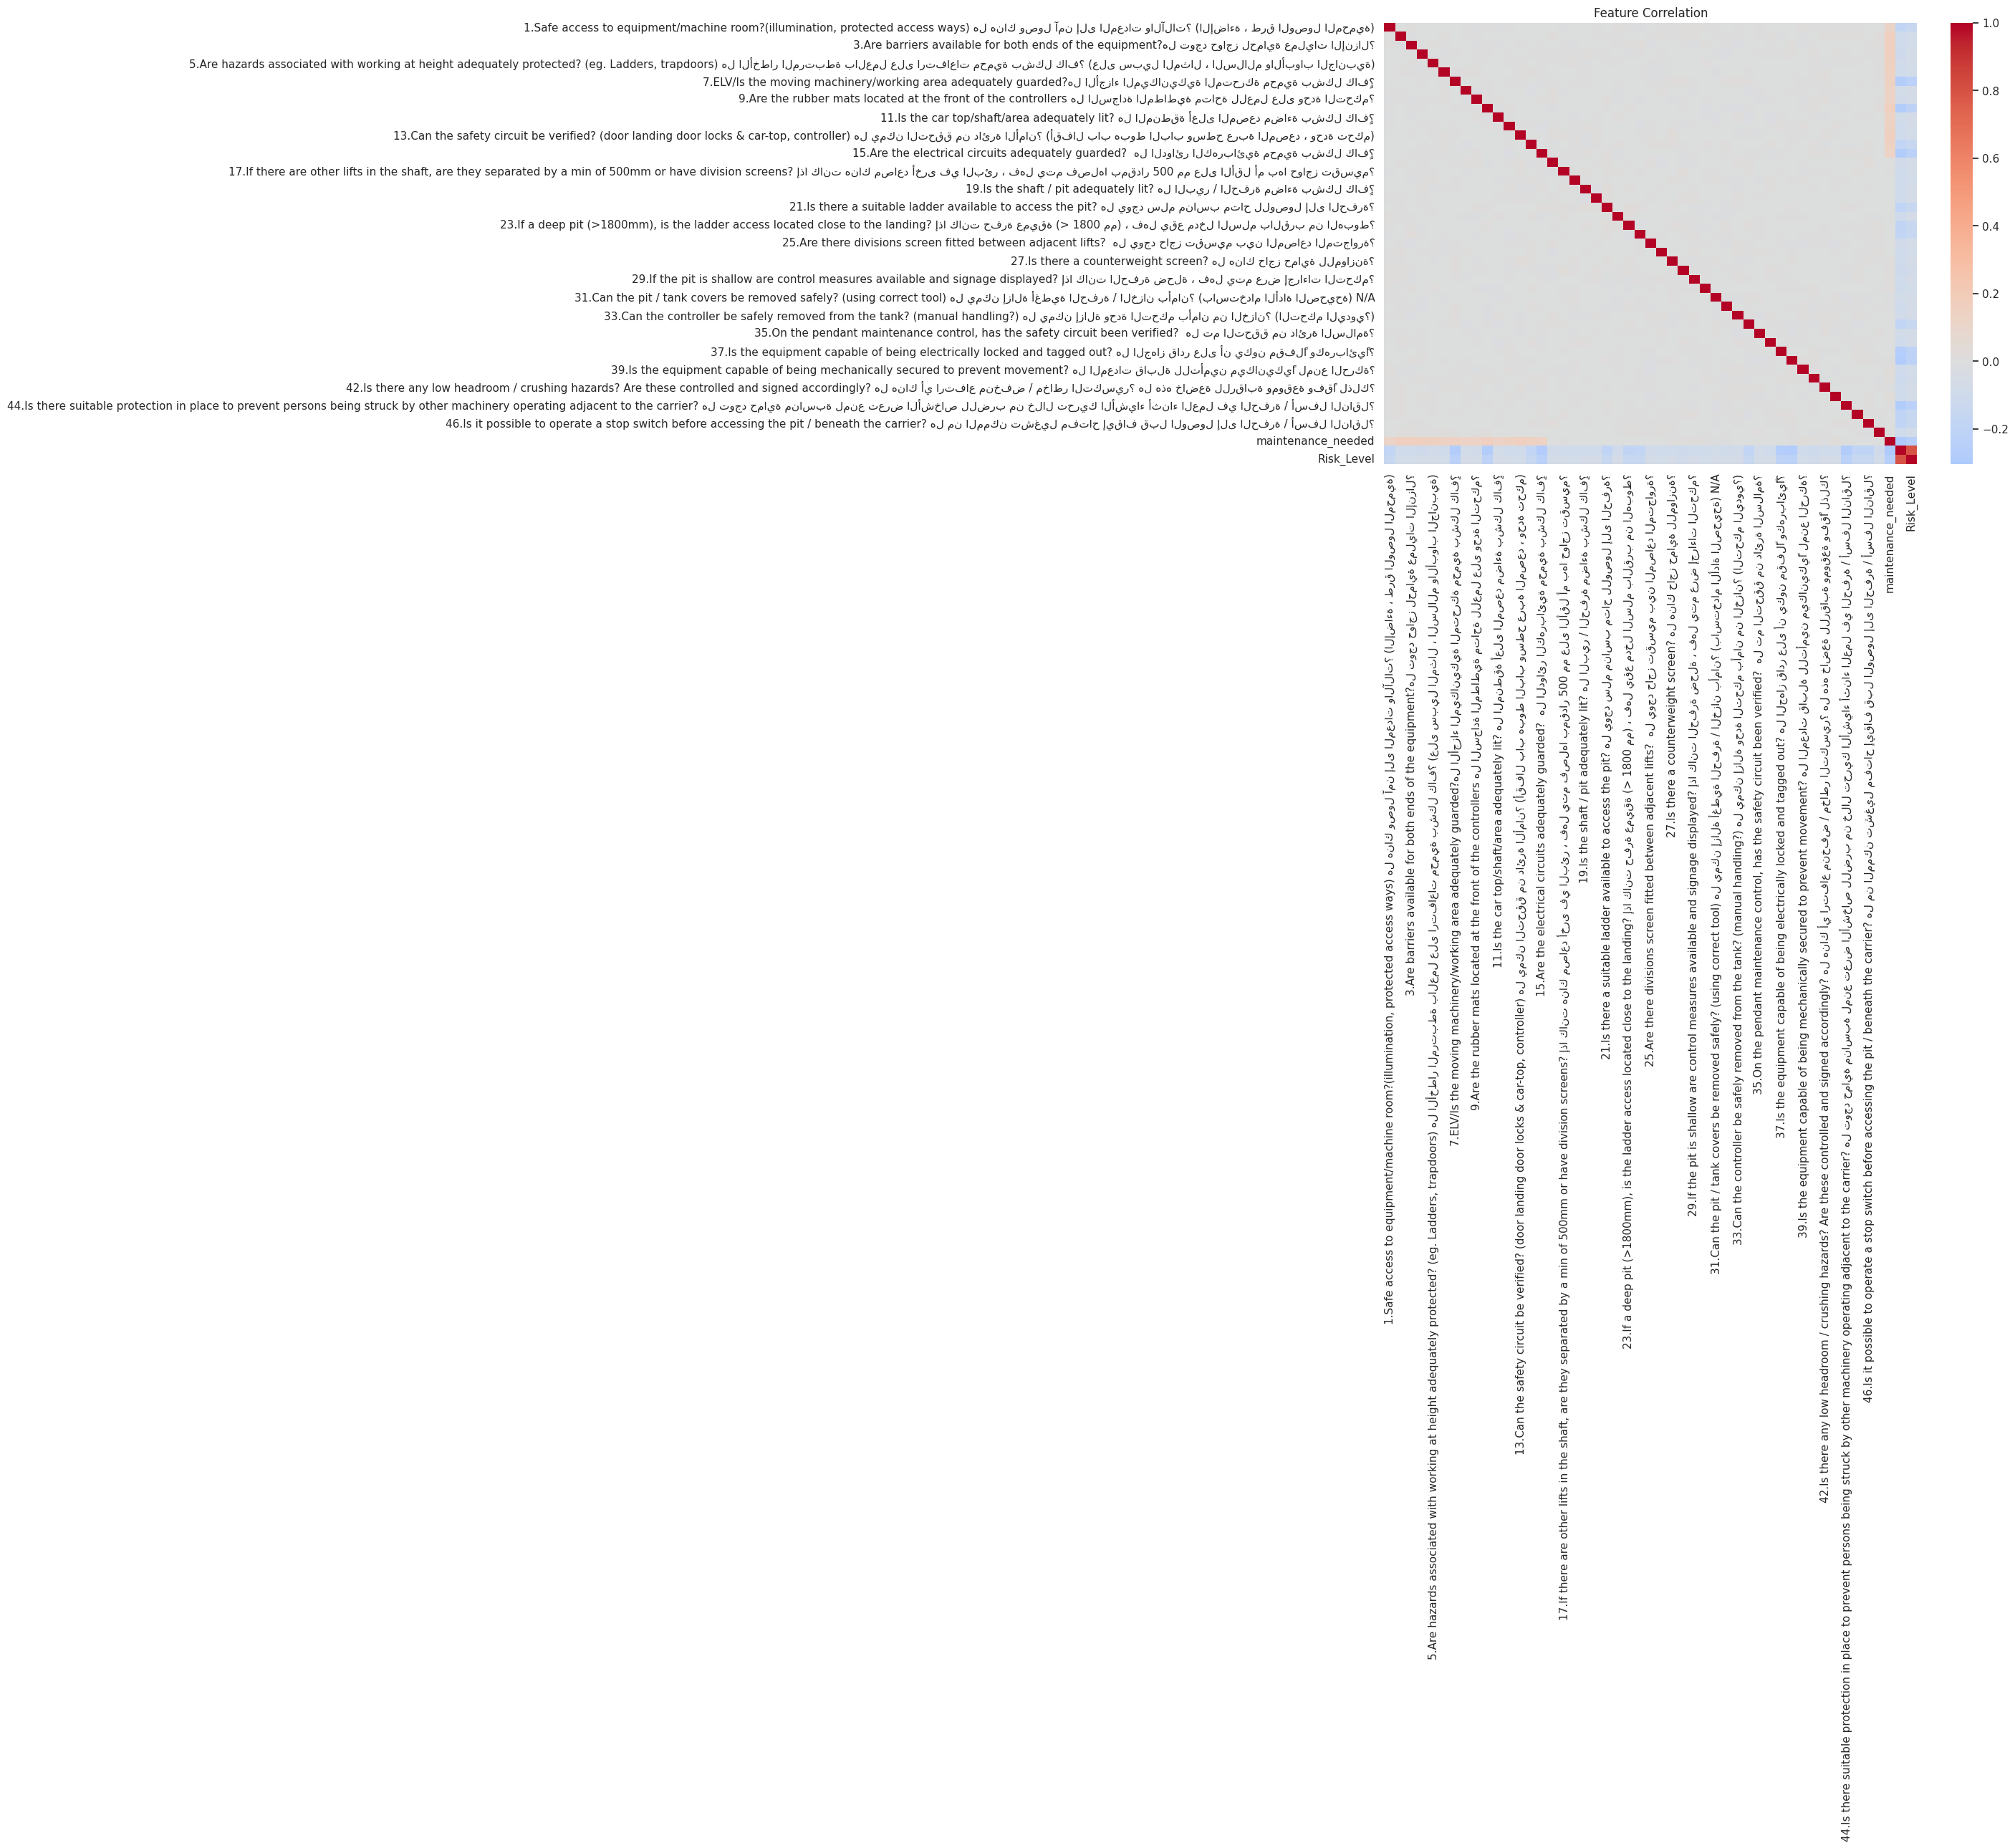

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation")
plt.show()


In [ ]:
X = df.drop(columns=["Risk_Level", "Risk_Score"], errors="ignore")
y = df["Risk_Level"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [ ]:

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    class_weight={1: 6, 2: 1, 3: 2},
    random_state=42
)


rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))


Random Forest Results
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        50
           2       0.82      0.99      0.90      3155
           3       0.96      0.59      0.73      1519

    accuracy                           0.85      4724
   macro avg       0.59      0.53      0.54      4724
weighted avg       0.86      0.85      0.83      4724



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


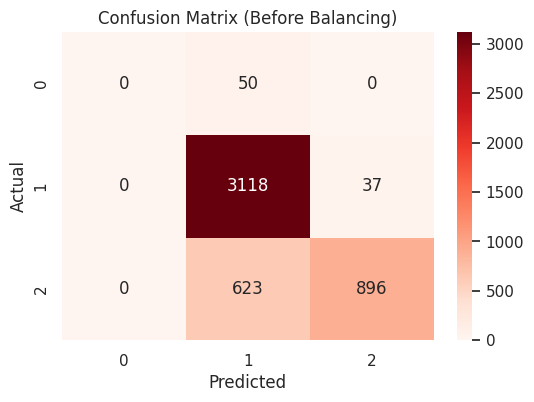

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Before Balancing)")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(
    sampling_strategy="auto",
    random_state=42,
    k_neighbors=3
)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_sm.value_counts())


Before SMOTE:
Risk_Level
2    12617
3     6078
1      198
0        0
Name: count, dtype: int64

After SMOTE:
Risk_Level
1    12617
2    12617
3    12617
0        0
Name: count, dtype: int64


In [ ]:
rf_balanced = RandomForestClassifier(
    n_estimators=400,
    max_depth=18,
    class_weight=None,
    random_state=42
)

rf_balanced.fit(X_train_sm, y_train_sm)

y_pred_bal = rf_balanced.predict(X_test)

print("Random Forest Results (After SMOTE)")
print(classification_report(y_test, y_pred_bal))


Random Forest Results (After SMOTE)
              precision    recall  f1-score   support

           1       1.00      0.06      0.11        50
           2       0.86      0.98      0.91      3155
           3       0.93      0.69      0.79      1519

    accuracy                           0.87      4724
   macro avg       0.93      0.58      0.61      4724
weighted avg       0.88      0.87      0.87      4724



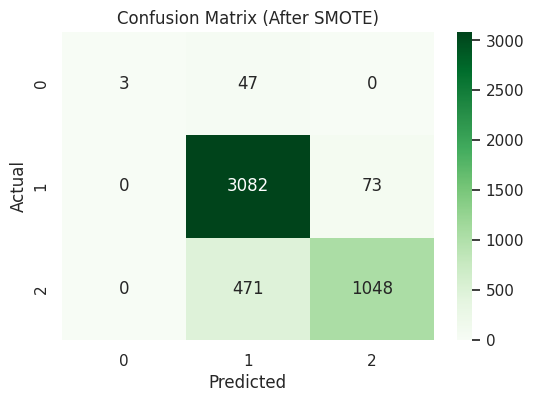

In [ ]:
cm = confusion_matrix(y_test, y_pred_bal)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (After SMOTE)")
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Random Forest Base
rf_grid = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [12, 18],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

random_search = RandomizedSearchCV(
    estimator=rf_grid,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_sm, y_train_sm)

best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 12}


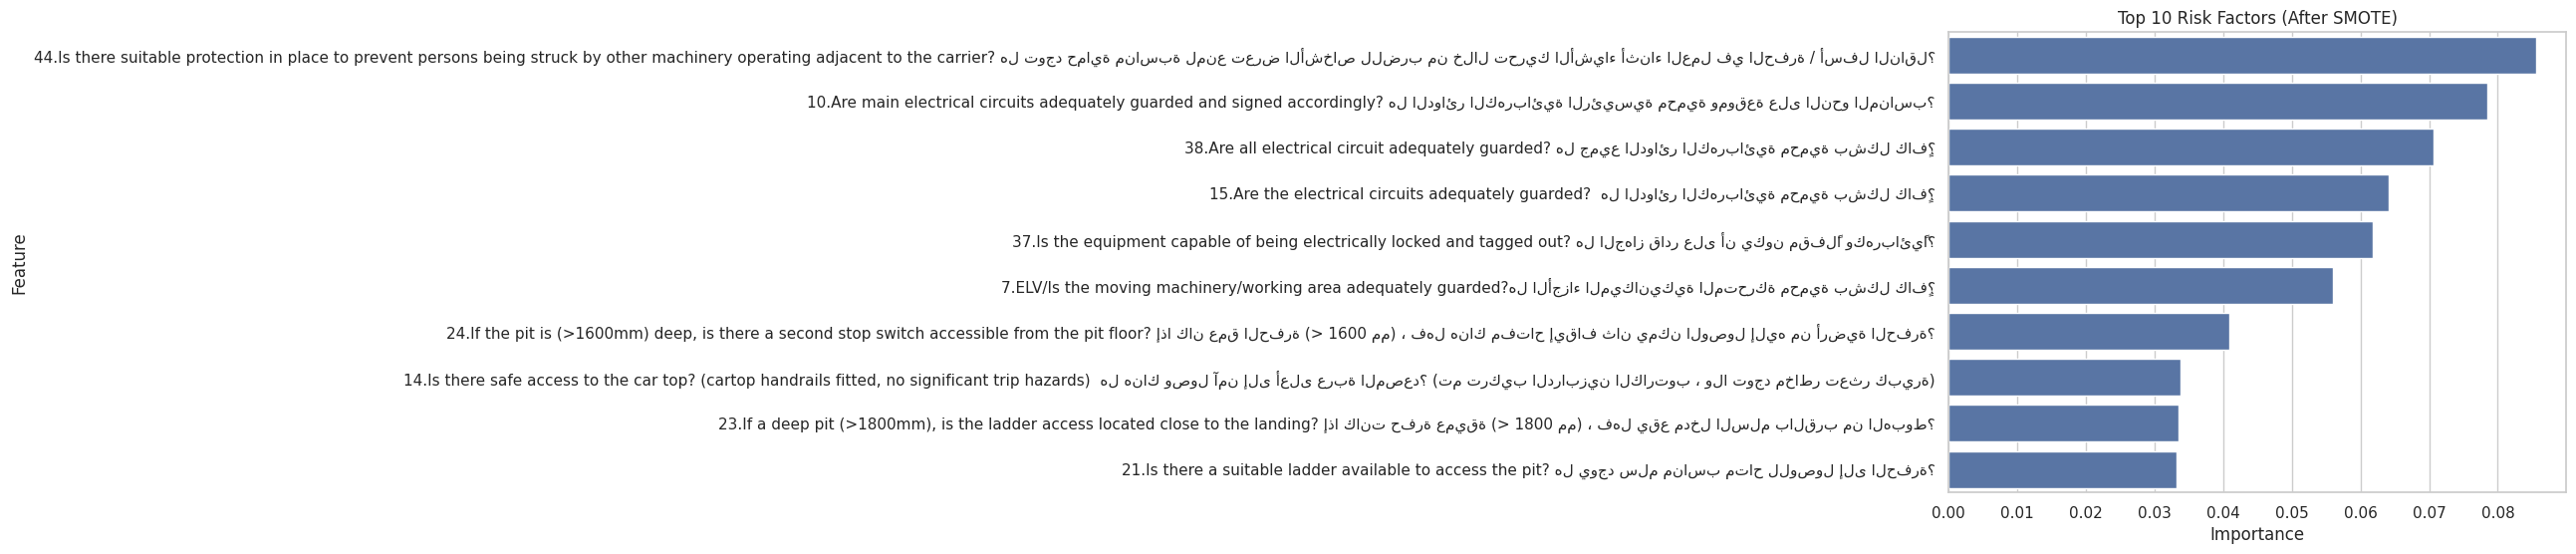

,Feature,Importance
42,44.Is there suitable protection in place to pr...,0.085657
9,10.Are main electrical circuits adequately gua...,0.078548
37,38.Are all electrical circuit adequately guard...,0.070627
14,15.Are the electrical circuits adequately guar...,0.064147
36,37.Is the equipment capable of being electrica...,0.061775
6,7.ELV/Is the moving machinery/working area ade...,0.055944
23,"24.If the pit is (>1600mm) deep, is there a se...",0.040851
13,14.Is there safe access to the car top? (carto...,0.033861
22,"23.If a deep pit (>1800mm), is the ladder acce...",0.033456
20,21.Is there a suitable ladder available to acc...,0.033185


In [ ]:
importances = best_rf.feature_importances_
features = X_train_sm.columns

imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=imp_df.head(10))
plt.title("Top 10 Risk Factors (After SMOTE)")
plt.show()

imp_df.head(10)


In [ ]:
top_features = imp_df['Feature'].head(15).tolist()
X_train_top = X_train_sm[top_features]
X_test_top = X_test[top_features]

print("Top 15 features selected:", top_features)


Top 15 features selected: ['44.Is there suitable protection in place to prevent persons being struck by other machinery operating adjacent to the carrier? هل توجد حماية مناسبة لمنع تعرض الأشخاص للضرب من خلال تحريك الأشياء أثناء العمل في الحفرة / أسفل الناقل؟', '10.Are main electrical circuits adequately guarded and signed accordingly? هل الدوائر الكهربائية الرئيسية محمية وموقعة على النحو المناسب؟', '38.Are all electrical circuit adequately guarded? هل جميع الدوائر الكهربائية محمية بشكل كافٍ؟', '15.Are the electrical circuits adequately guarded?  هل الدوائر الكهربائية محمية بشكل كافٍ؟', '37.Is the equipment capable of being electrically locked and tagged out? هل الجهاز قادر على أن يكون مقفلًا وكهربائيًا؟', '7.ELV/Is the moving machinery/working area adequately guarded?هل الأجزاء الميكانيكية المتحركة محمية بشكل كافٍ؟', '24.If the pit is (>1600mm) deep, is there a second stop switch accessible from the pit floor? إذا كان عمق الحفرة (> 1600 مم) ، فهل هناك مفتاح إيقاف ثان يمكن الوصول إليه م

Random Forest Results (Top Features)
              precision    recall  f1-score   support

           1       0.44      0.38      0.41        50
           2       0.86      0.90      0.88      3155
           3       0.79      0.71      0.74      1519

    accuracy                           0.83      4724
   macro avg       0.70      0.66      0.68      4724
weighted avg       0.83      0.83      0.83      4724



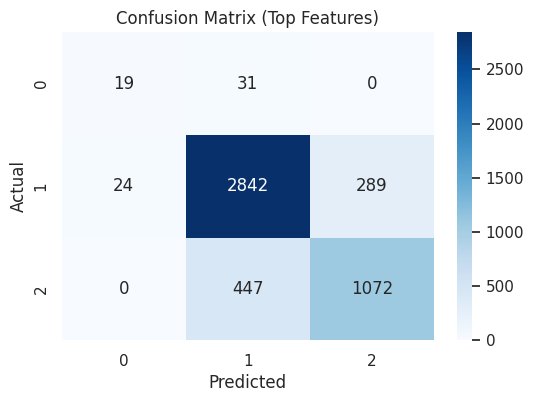

In [ ]:
X_train_top = X_train_sm[top_features]
X_test_top = X_test[top_features]

rf_top = RandomForestClassifier(
    n_estimators=best_rf.n_estimators,
    max_depth=best_rf.max_depth,
    min_samples_split=best_rf.min_samples_split,
    min_samples_leaf=best_rf.min_samples_leaf,
    random_state=42,
    class_weight='balanced'
)

rf_top.fit(X_train_top, y_train_sm)

y_pred_top_rf = rf_top.predict(X_test_top)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Random Forest Results (Top Features)")
print(classification_report(y_test, y_pred_top_rf, zero_division=0))

cm = confusion_matrix(y_test, y_pred_top_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Top Features)")
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:18:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results (Top Features, Classes 0-indexed)
              precision    recall  f1-score   support

           0       0.38      0.30      0.34        50
           1       0.87      0.89      0.88      3155
           2       0.78      0.74      0.76      1519

    accuracy                           0.84      4724
   macro avg       0.68      0.65      0.66      4724
weighted avg       0.84      0.84      0.84      4724



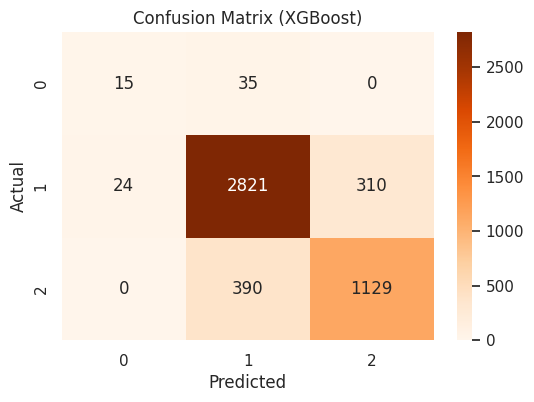

In [ ]:
y_train_xgb = y_train_sm.astype(int) - 1
y_test_xgb  = y_test.astype(int) - 1

from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)

xgb.fit(X_train_top, y_train_xgb)
y_pred_xgb = xgb.predict(X_test_top)

from sklearn.metrics import classification_report, confusion_matrix

print("XGBoost Results (Top Features, Classes 0-indexed)")
print(classification_report(y_test_xgb, y_pred_xgb, zero_division=0))

cm = confusion_matrix(y_test_xgb, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (XGBoost)")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# RF Predictions
y_pred_rf = rf_top.predict(X_test_top)

# XGBoost Predictions
y_pred_xgb_orig = y_pred_xgb + 1

# Accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_xgb = accuracy_score(y_test, y_pred_xgb_orig)

f1_rf = f1_score(y_test, y_pred_rf, average='macro')
f1_xgb = f1_score(y_test, y_pred_xgb_orig, average='macro')

comparison_df = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "Accuracy": [acc_rf, acc_xgb],
    "F1-macro": [f1_rf, f1_xgb]
})

print(comparison_df)


           Model  Accuracy  F1-macro
0  Random Forest  0.832557  0.676961
1        XGBoost  0.839331  0.660619


In [ ]:
print(f"""
MODEL COMPARISON SUMMARY:

Random Forest vs XGBoost:

- Random Forest: Accuracy = {acc_rf:.3f}, Macro F1 = {f1_rf:.3f}
- XGBoost: Accuracy = {acc_xgb:.3f}, Macro F1 = {f1_xgb:.3f}

FINAL MODEL SELECTION:

Recommended Model: Random Forest (After SMOTE + Top Features)

Reasons:
1. Highest Macro F1 and recall for critical classes.
2. Clear feature importance → easy interpretation for maintenance management.
3. More stable with missing data and noise compared to XGBoost.
4. Easier deployment in maintenance dashboards.

Focus on recall for critical classes is more important than overall accuracy to minimize undetected risks.
""")



MODEL COMPARISON SUMMARY:

Random Forest vs XGBoost:

- Random Forest: Accuracy = 0.833, Macro F1 = 0.677
- XGBoost: Accuracy = 0.839, Macro F1 = 0.661

FINAL MODEL SELECTION:

Recommended Model: Random Forest (After SMOTE + Top Features)

Reasons:
1. Highest Macro F1 and recall for critical classes.
2. Clear feature importance → easy interpretation for maintenance management.
3. More stable with missing data and noise compared to XGBoost.
4. Easier deployment in maintenance dashboards.

Focus on recall for critical classes is more important than overall accuracy to minimize undetected risks.



In [ ]:
import pandas as pd
from xgboost import XGBClassifier

sample_1 = [
1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1
]

sample_2 = [
0,1,0,1,0,0,1,0,0,0,
0,1,0,1,1,0,0,1,0,0,
0,1,0,1,0,1,0,0,0,0,
0,0,1,0,0,0,1,0,0,1,
0,0,1,0,0,0,0
]

df_input = pd.DataFrame([sample_1, sample_2], columns=X_train_sm.columns)

#Random Forest predictions
rf_preds = best_rf.predict(df_input)

#XGBoost preparation and fit
y_train_xgb = y_train_sm.astype(int) - 1
xgb_model = XGBClassifier(
    n_estimators=200, max_depth=6, learning_rate=0.1,
    random_state=42, use_label_encoder=False, eval_metric="mlogloss"
)
xgb_model.fit(X_train_sm, y_train_xgb)

#XGBoost predictions (+1 to map back to original labels)
xgb_preds = xgb_model.predict(df_input) + 1

def label_maintenance(pred):
    return "Need Maintenance" if pred in [1,2] else "No Maintenance"

for i, (rf_p, xgb_p) in enumerate(zip(rf_preds, xgb_preds), 1):
    print(f"\nSample {i}:")
    print("✅ Random Forest Prediction:", rf_p, "→", label_maintenance(rf_p))
    print("✅ XGBoost Prediction   :", xgb_p, "→", label_maintenance(xgb_p))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:47:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Sample 1:
✅ Random Forest Prediction: 2 → Need Maintenance
✅ XGBoost Prediction   : 2 → Need Maintenance

Sample 2:
✅ Random Forest Prediction: 3 → No Maintenance
✅ XGBoost Prediction   : 3 → No Maintenance


/tmp/ipython-input-3798391658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


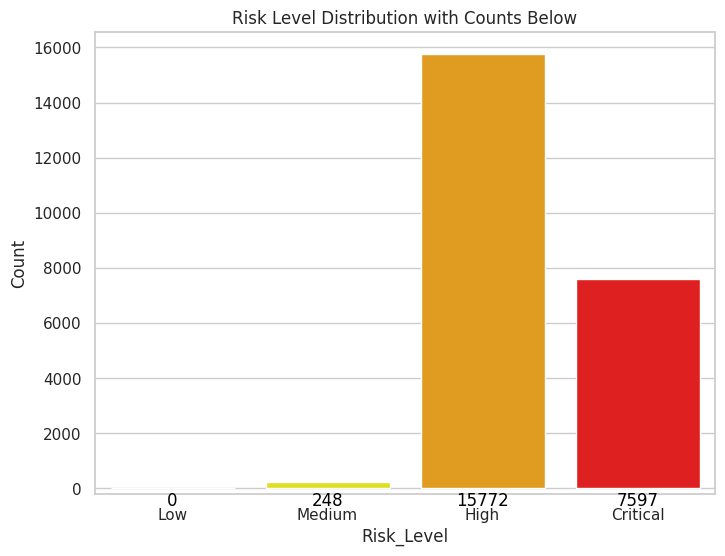

In [84]:
plt.figure(figsize=(8,6))
counts = df['Risk_Level'].value_counts().sort_index()
colors = ['green', 'yellow', 'orange', 'red']

sns.barplot(
    x=counts.index,
    y=counts.values,
    palette=colors
)
for i, v in enumerate(counts.values):
    plt.text(i, -100, str(v), ha='center', va='top', fontsize=12, color='black')
plt.xticks(ticks=[0,1,2,3], labels=['Low','Medium','High','Critical'])
plt.ylabel("Count")
plt.title("Risk Level Distribution with Counts Below")
plt.ylim(bottom=-200)
plt.show()


In [87]:
!pip install plotly -q
import plotly.express as px

fig = px.bar(imp_df.head(15), x='Importance', y='Feature', orientation='h',
             color='Importance', color_continuous_scale='Oranges')
fig.update_layout(title="Top 15 Risk Factors (Interactive)")
fig.show()


In [91]:
import plotly.figure_factory as ff

labels = ['Low', 'Medium', 'High']
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig = ff.create_annotated_heatmap(
    z=cm_norm,
    x=labels,
    y=labels,
    colorscale='Blues',
    showscale=True,
    reversescale=False
)

fig.update_layout(title="Normalized Confusion Matrix")
fig.show()


/tmp/ipython-input-3319519147.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




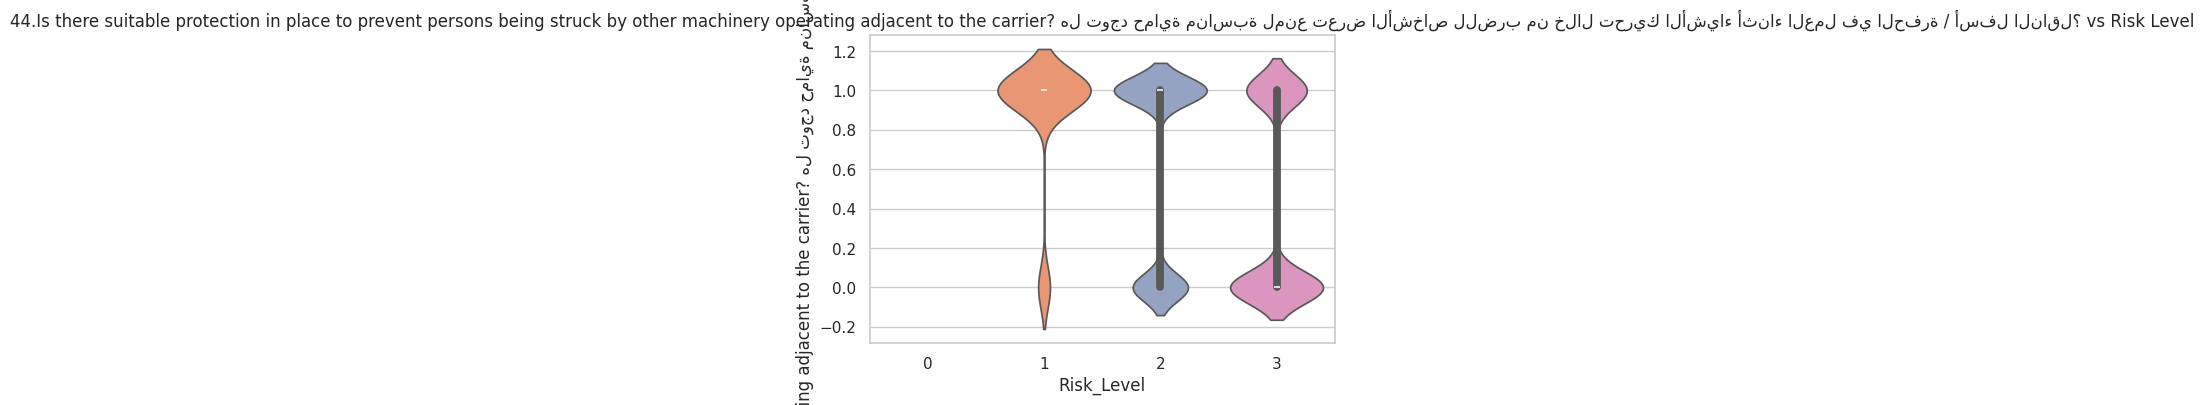

/tmp/ipython-input-3319519147.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




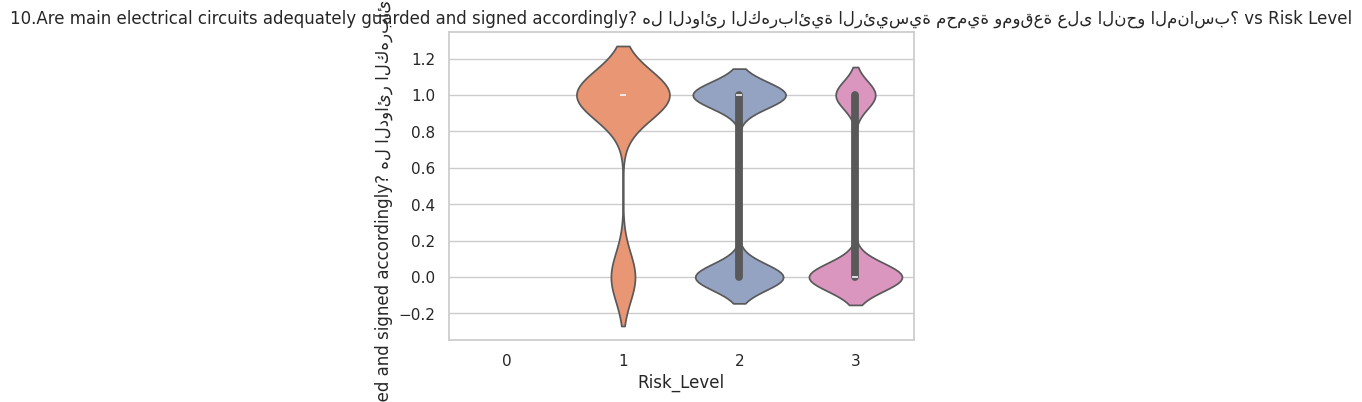

/tmp/ipython-input-3319519147.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




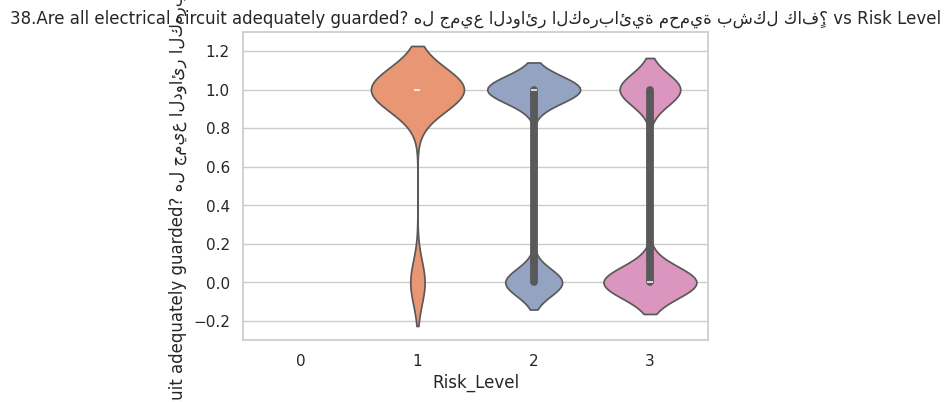

/tmp/ipython-input-3319519147.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




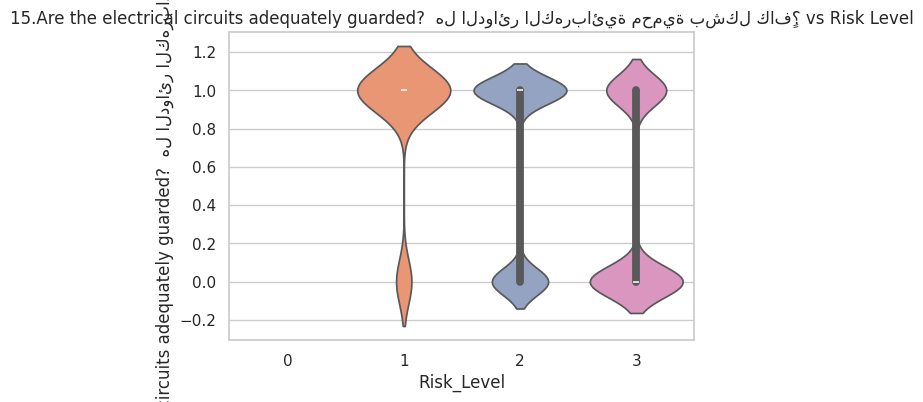

/tmp/ipython-input-3319519147.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




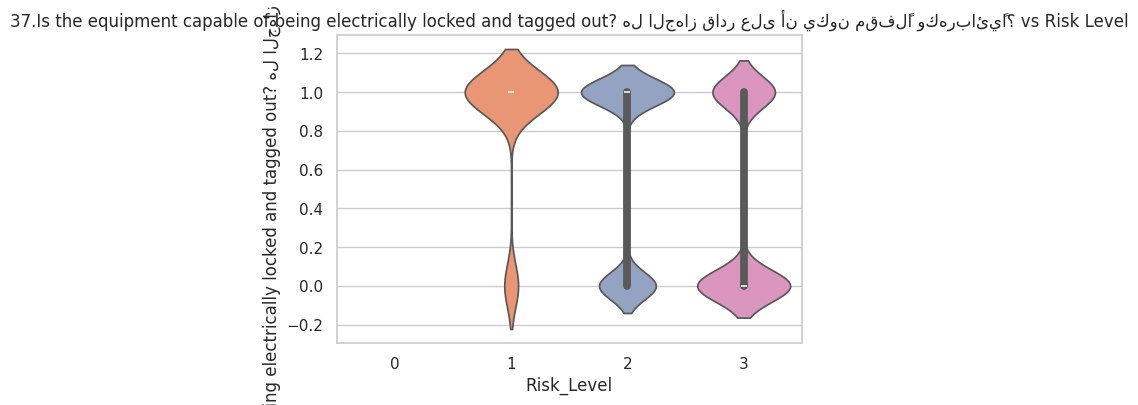

In [90]:
top_features = imp_df['Feature'].head(5).tolist()
for feature in top_features:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='Risk_Level', y=feature, data=df, palette='Set2')
    plt.title(f"{feature} vs Risk Level")
    plt.show()
